In [66]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')
from datetime import datetime
print(datetime.now())
import os
print(os.getcwd())

#====
import numpy as np
import pandas as pd
import pandasql
#import sqlalchemy
import pymongo


import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline


2021-03-10 09:16:25.677278
/Volumes/GoogleDrive/My Drive/01_Mac2021/05_Work/00_Pruebas técnicas/01_software_engenieer/00_agranimo


In [158]:

df = pd.read_csv("docs/Event.csv", 
                 #index_col= ["payload.TMS"],
                 parse_dates = ["payload.TMS"], 
                 dtype = {
                         #"payload.TMS": 'datetime64[ns]'
                         }
                )

df.info()
df = df.sort_values(by="payload.TMS")
print(datetime.now())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459556 entries, 0 to 459555
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   _id             459556 non-null  object 
 1   createdAt       459556 non-null  object 
 2   packet.cmd      459556 non-null  object 
 3   packet.dup      459556 non-null  bool   
 4   packet.length   459556 non-null  int64  
 5   packet.payload  459556 non-null  object 
 6   packet.qos      459556 non-null  int64  
 7   packet.retain   459556 non-null  bool   
 8   packet.topic    459556 non-null  object 
 9   payload.BFMW    340043 non-null  float64
 10  payload.BSID    340043 non-null  object 
 11  payload.DID     459556 non-null  object 
 12  payload.FMW     452372 non-null  float64
 13  payload.TMS     452372 non-null  object 
 14  payload.bvol    452372 non-null  float64
 15  payload.hum1    123892 non-null  float64
 16  payload.lwet    35617 non-null   float64
 17  payload.pr

##### Let's check the columns in our database

In [163]:
print(datetime.now())

#Columns refered to payload
columns_payload = [col for col in df.columns if col.startswith("payload")]

#Columns refered to packet 
columns_packet = [col for col in df.columns if col.startswith("packet")]

columns = ["_id",
           "processed",
           "payload.DID",
           "payload.hum1",
           "payload.TMS",
           "payload.prec",
           "payload.solr",
           "payload.tem1",
          ]
base = df[columns]

rename_columns = { 
                   "_id":"id",
                   "processed":"processed",
                   "payload.DID":"payload_DID",
                   "payload.hum1":"payload_hum1",
                   "payload.TMS":"payload_TMS",
                   "payload.prec":"payload_prec",
                   "payload.solr":"payload_solr",
                   "payload.tem1":"payload_tem1",
                    }
base = base.rename(columns = rename_columns)

base = base.dropna(subset = ["payload_TMS"])
base["payload_TMS"] = pd.to_datetime(base.payload_TMS, unit='s')
base = base.sort_values(by="payload_TMS")

base.info()


2021-03-10 09:59:41.246573
<class 'pandas.core.frame.DataFrame'>
Int64Index: 452372 entries, 351921 to 459553
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            452372 non-null  object        
 1   processed     452372 non-null  bool          
 2   payload_DID   452372 non-null  object        
 3   payload_hum1  123892 non-null  float64       
 4   payload_TMS   452372 non-null  datetime64[ns]
 5   payload_prec  8311 non-null    float64       
 6   payload_solr  123892 non-null  float64       
 7   payload_tem1  123892 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), object(2)
memory usage: 28.0+ MB


In [164]:
print(datetime.now())
print(base.payload_TMS.head())
base.set_index('payload_TMS', inplace=True)
base.info()
base.head()

2021-03-10 09:59:45.159098
351921   2000-01-01 00:00:02
402964   2000-01-01 00:00:02
247571   2000-01-01 00:00:02
274498   2000-01-01 00:00:02
274730   2000-01-01 00:00:02
Name: payload_TMS, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 452372 entries, 2000-01-01 00:00:02 to 2021-03-05 12:16:36
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            452372 non-null  object 
 1   processed     452372 non-null  bool   
 2   payload_DID   452372 non-null  object 
 3   payload_hum1  123892 non-null  float64
 4   payload_prec  8311 non-null    float64
 5   payload_solr  123892 non-null  float64
 6   payload_tem1  123892 non-null  float64
dtypes: bool(1), float64(4), object(2)
memory usage: 24.6+ MB


,id,processed,payload_DID,payload_hum1,payload_prec,payload_solr,payload_tem1
payload_TMS,,,,,,,
2000-01-01 00:00:02,603d5a289b6589e416fcecea,False,5_157,NaN,NaN,NaN,NaN
2000-01-01 00:00:02,603f92c39b65893de5fdb44d,False,5_156,NaN,NaN,NaN,NaN
2000-01-01 00:00:02,603969629b65890793fb554c,False,5_156,NaN,NaN,NaN,NaN
2000-01-01 00:00:02,603ab25e9b65892bf9fbbe7b,False,5_157,NaN,NaN,NaN,NaN
2000-01-01 00:00:02,603ab3da9b65894f21fbbf63,False,5_150,NaN,NaN,NaN,NaN


In [165]:
print(pd.Index(base).is_all_dates)
base.head()
base.tail()

False


,id,processed,payload_DID,payload_hum1,payload_prec,payload_solr,payload_tem1
payload_TMS,,,,,,,
2021-03-05 12:15:06,604221129b65892dfefe914e,False,5_49,NaN,NaN,NaN,NaN
2021-03-05 12:15:51,604221079b65895b96fe914c,False,1_125,59.8,NaN,331.0,6.9
2021-03-05 12:15:51,604221159b65891caffe914f,False,1_63,82.2,NaN,185.0,17.7
2021-03-05 12:16:16,604221339b6589635ffe9157,False,1_101,77.6,NaN,160.0,17.2
2021-03-05 12:16:36,604221419b65897d66fe915a,False,1_51,95.0,NaN,92.0,16.8


In [166]:
def PlotIndexSet(x_axis, y_axis, df ):
    """
    Plot a column of a dataframe. x_axis is the index.
    x_axis (str)
    y_axis (str)
    """
    plt.figure(figsize=(15, 7))
    plt.plot(df[y_axis])
    title = 'Variable '+ y_axis + ' watched over ' + x_axis +'.'
    plt.title(title)
    plt.grid(True)
    plt.show()
    print(df.head())
    


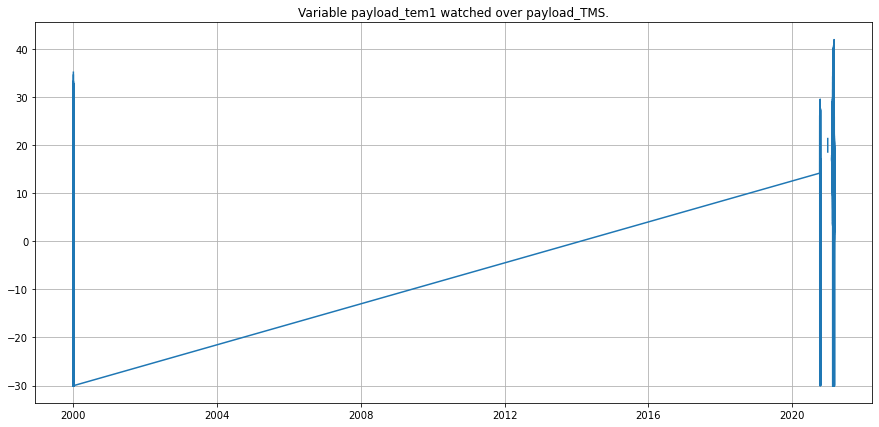

                                           id  processed payload_DID  \
payload_TMS                                                            
2000-01-01 00:00:02  603d5a289b6589e416fcecea      False       5_157   
2000-01-01 00:00:02  603f92c39b65893de5fdb44d      False       5_156   
2000-01-01 00:00:02  603969629b65890793fb554c      False       5_156   
2000-01-01 00:00:02  603ab25e9b65892bf9fbbe7b      False       5_157   
2000-01-01 00:00:02  603ab3da9b65894f21fbbf63      False       5_150   

                     payload_hum1  payload_prec  payload_solr  payload_tem1  
payload_TMS                                                                  
2000-01-01 00:00:02           NaN           NaN           NaN           NaN  
2000-01-01 00:00:02           NaN           NaN           NaN           NaN  
2000-01-01 00:00:02           NaN           NaN           NaN           NaN  
2000-01-01 00:00:02           NaN           NaN           NaN           NaN  
2000-01-01 00:00:02        

In [167]:
PlotIndexSet(df=base, x_axis='payload_TMS', y_axis='payload_tem1')

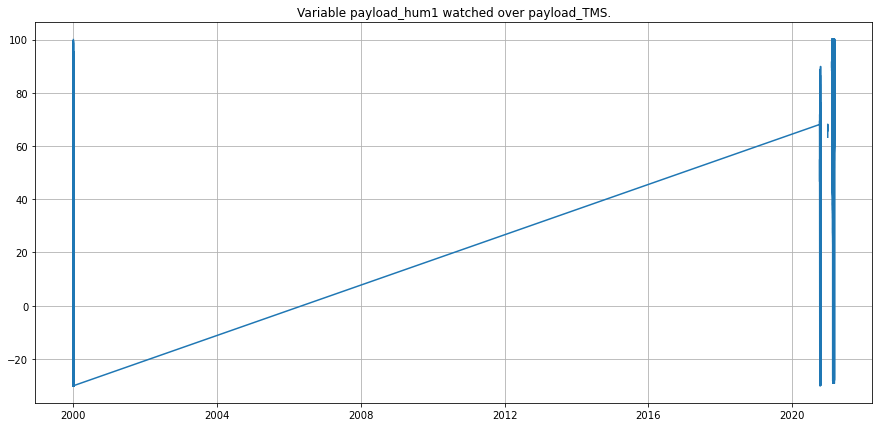

                                           id  processed payload_DID  \
payload_TMS                                                            
2000-01-01 00:00:02  603d5a289b6589e416fcecea      False       5_157   
2000-01-01 00:00:02  603f92c39b65893de5fdb44d      False       5_156   
2000-01-01 00:00:02  603969629b65890793fb554c      False       5_156   
2000-01-01 00:00:02  603ab25e9b65892bf9fbbe7b      False       5_157   
2000-01-01 00:00:02  603ab3da9b65894f21fbbf63      False       5_150   

                     payload_hum1  payload_prec  payload_solr  payload_tem1  
payload_TMS                                                                  
2000-01-01 00:00:02           NaN           NaN           NaN           NaN  
2000-01-01 00:00:02           NaN           NaN           NaN           NaN  
2000-01-01 00:00:02           NaN           NaN           NaN           NaN  
2000-01-01 00:00:02           NaN           NaN           NaN           NaN  
2000-01-01 00:00:02        

In [168]:
PlotIndexSet(df=base, x_axis='payload_TMS', y_axis='payload_hum1')

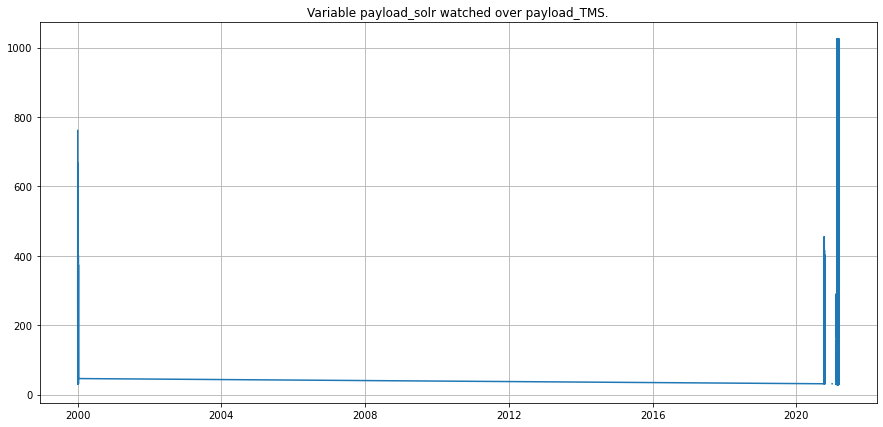

                                           id  processed payload_DID  \
payload_TMS                                                            
2000-01-01 00:00:02  603d5a289b6589e416fcecea      False       5_157   
2000-01-01 00:00:02  603f92c39b65893de5fdb44d      False       5_156   
2000-01-01 00:00:02  603969629b65890793fb554c      False       5_156   
2000-01-01 00:00:02  603ab25e9b65892bf9fbbe7b      False       5_157   
2000-01-01 00:00:02  603ab3da9b65894f21fbbf63      False       5_150   

                     payload_hum1  payload_prec  payload_solr  payload_tem1  
payload_TMS                                                                  
2000-01-01 00:00:02           NaN           NaN           NaN           NaN  
2000-01-01 00:00:02           NaN           NaN           NaN           NaN  
2000-01-01 00:00:02           NaN           NaN           NaN           NaN  
2000-01-01 00:00:02           NaN           NaN           NaN           NaN  
2000-01-01 00:00:02        

In [169]:
PlotIndexSet(df=base, x_axis='payload_TMS', y_axis='payload_solr')

In [149]:
base.head()

,id,processed,payload_DID,payload_hum1,payload_prec,payload_solr,payload_tem1
payload_TMS,,,,,,,
2021-02-16 18:13:38,602c0fae61c8cf27e36283d8,False,18_84,95.6,NaN,31.0,3.8
2021-02-16 18:14:08,602c0fb361c8cf27e36283d9,False,3_33,NaN,NaN,NaN,NaN
2021-02-16 18:23:14,602c0fbd61c8cf27e36283da,False,5_47,NaN,NaN,NaN,NaN
2021-02-16 18:17:18,602c0fbe61c8cf27e36283db,False,5_182,NaN,NaN,NaN,NaN
2021-02-16 18:32:09,602c0fc061c8cf27e36283dc,False,1_59,74.8,NaN,138.0,18.7


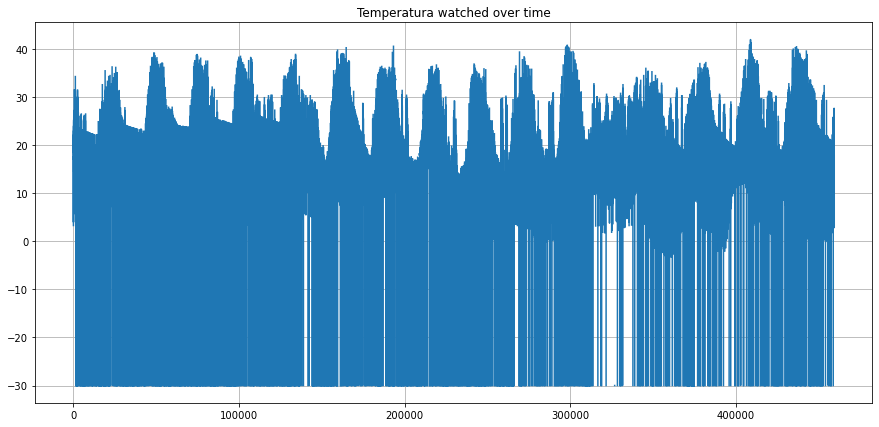

In [45]:
base.set_index("payload_TMS")
plt.figure(figsize=(15, 7))
plt.plot(base.payload_tem1)
plt.title('Temperature watched over time')
plt.grid(True)
plt.show()


## Variables
    (RH)   -    Relative humidity 
    (T)    -    Temperature
    (OT)   -    Optimal temperature

# Conditions


### for germination

RH > 60%
15.5C < T   < 30C
18C   < OT  < 30C
RH + OT = high risk when sporulation - thus allows growers to spray fungicide at the optimal time to prevent primary infection. 



In [46]:
df["payload.DID"].unique()
len(df["_id"].unique())

459556